<a href="https://colab.research.google.com/github/kkamal11/MLT/blob/main/K_Means_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import numpy as np
import matplotlib.pyplot as plt


# Week-3

**Note to Learners**: 

- For questions that involve plotting, just enter $0$ as the answer in the portal.
- For numerical questions, there are two parts. The first part expects you to compute some quantity, say a parameter of a machine learning model. The second part will require you to convert this quantity (if it is not a scalar) into a scalar so that it can be entered as the answer on the portal to the corresponding NAT question.



## Dataset

Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. You will be using this dataset for the rest of the assignment. 

**Do not edit this cell.**

In [93]:
np.random.seed(0)

N = 2000
data1 = np.random.randn(N//3,2) + np.array([2,2])
data2 = np.random.randn(N//3,2) + np.array([-3,-3])
data3 = np.random.randn(N//3,2) + np.array([-5,3])
X = np.concatenate((data1, data2, data3))


## Problem 1
How many samples are there in the dataset?



## Solution

In [94]:
# Enter your solution here
n,d = X.shape
print(n)

1998


## Problem 2

How many features are there in the dataset?


## Solution

In [95]:
# Enter your solution here
print(d)

2


## Problem 3
Plot the dataset using matplotlib.



## Solution

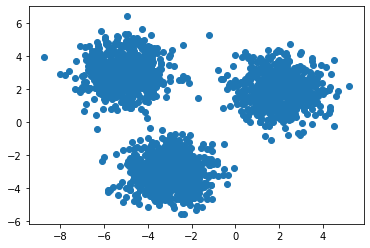

In [96]:
# Enter your solution here
plt.scatter(X[:,0],X[:,1])
plt.show()

## Instruction

Assume k = 3. Take the data points with indices 200, 800 and 1200 in X to be the initial cluster centers.


In [97]:
def distance(x,y):
    return np.linalg.norm(x-y)

In [98]:
np.random.seed(9)
print(np.random.choice(9))

5


In [99]:
print(np.random.choice(9))

6


In [100]:
a1 = np.array([1,2,3])
a2 = np.array([4,5,6])
print(np.concatenate((a1,a2)))
print(np.concatenate((a1,a2), axis=0))

[1 2 3 4 5 6]
[1 2 3 4 5 6]


In [101]:
a1 = np.array([[1,2,3],[1,2,3]])
a2 = np.array([[4,5,6],[4,5,6]])
print(np.concatenate((a1,a2)))
print(np.concatenate((a1,a2), axis=1))

[[1 2 3]
 [1 2 3]
 [4 5 6]
 [4 5 6]]
[[1 2 3 4 5 6]
 [1 2 3 4 5 6]]


In [102]:
a11 = np.append(a1,-100)
a11

array([   1,    2,    3,    1,    2,    3, -100])

In [103]:
print(np.min(a11))
print(np.argmin(a11))

-100
6


In [104]:
def initialize_cluster(X,indices):
    return X[indices]

In [105]:
x = np.array([1,2,3,4,5,6])
initialize_cluster(x,np.array([2,4,5]))

array([3, 5, 6])

In [106]:
k = 3

indices = np.array([200,800,1200])
cluster_centers = initialize_cluster(X,indices)
cluster_centers

array([[ 1.40134606,  0.88410301],
       [-2.56922887, -3.14989159],
       [-2.84782302, -3.37412632]])

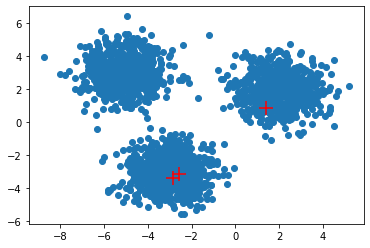

In [107]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker = '+', s = 200, color = 'r')
plt.show()

## Problem 4 

Write a function `assign_clusters(X, k, cluster_centers)` that assigns a cluster to each data point as per their distance from each cluster centre and returns a vector `z`, where $z[i] \in \{0, 1, 2\}$.

What is the mean of the values in vector `z`? Provide the answer correct up to three decimal places.



## Solution

In [108]:
def assign_clusters(X, k, cluster_centers):
    z = np.array([])
    for x in X:
        dist_from_each_cluster = [distance(x, cluster_centers[i]) for i in range(k)]
        # print(dist_from_each_cluster)
        chosen_cluster = np.argmin(dist_from_each_cluster)
        # print("chosen", chosen_cluster)
        z = np.append(z,chosen_cluster)
    return z

z = assign_clusters(X, k, cluster_centers)
z

array([0., 0., 0., ..., 1., 1., 1.])

In [109]:
print(np.mean(z))

0.7107107107107107


## Problem 5

Plot the data points, with different color for different clusters.


## Solution

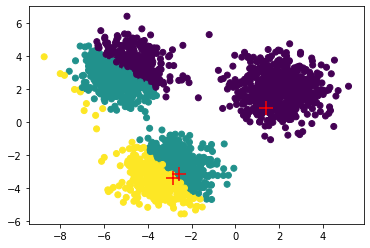

In [110]:
# Enter your solution here
def plot(X, cluster_centers,z):
    plt.scatter(X[:,0],X[:,1], c= z)
    plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker = '+', s = 200, color = 'r')
    plt.show()
    return

plot(X, cluster_centers, z)

## Problem 6
Write a function `compute_cluster_centers(X, z, k)` that computes the clusters' centers as per z and returns `k` new cluster centers.

What is the mean of the three cluster centers? Provide the $x_1$ and $y_1$ component. Provide both components correct up to three decimal places.



## Solution

In [111]:
# Enter your solution here
def compute_cluster_centers(X, z, k):
    mu = np.array([np.mean(X[z == i], axis=0) for i in range(k)])
    return mu

new_cluster_center = compute_cluster_centers(X, z, k)
print(new_cluster_center)
print("Mean",np.round(np.mean(new_cluster_center, axis = 0),3))

[[ 0.15243752  2.47002787]
 [-4.09339723  0.26891354]
 [-3.71658966 -3.31569723]]
Mean [-2.553 -0.192]


## Extra

Keep executing the code in problems 4, 5 and 6 (for, say, 10 iterations) to observe how the clusters change across different iterations.

## Solution

In [117]:
cluster_centers = initialize_cluster(X,indices)

In [118]:
def identify_cluster_center_for_each_point(X, cluster_centers, k):
    z = np.array([])
    for x in X:
        dist_from_each_cluster = [distance(x,cluster_centers[j]) for j in range(k)]
        chosen_cluster = np.argmin(dist_from_each_cluster)
        z = np.append(z, chosen_cluster)
    return z

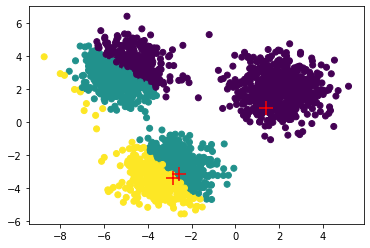

[0. 0. 0. ... 1. 1. 1.]


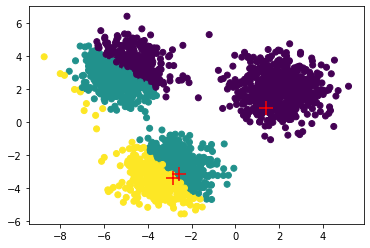

[0. 0. 0. ... 1. 1. 1.]


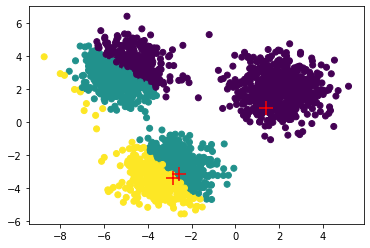

[0. 0. 0. ... 1. 1. 1.]


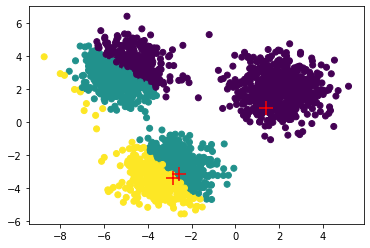

[0. 0. 0. ... 1. 1. 1.]


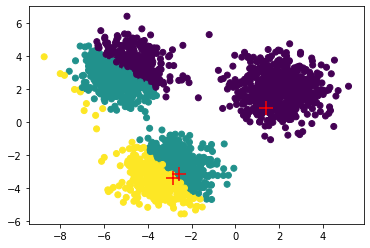

[0. 0. 0. ... 1. 1. 1.]


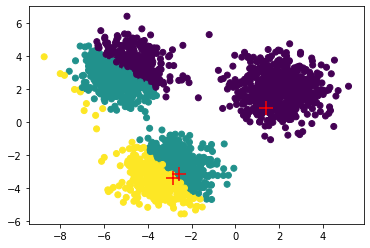

[0. 0. 0. ... 1. 1. 1.]


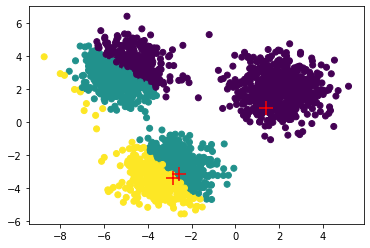

[0. 0. 0. ... 1. 1. 1.]


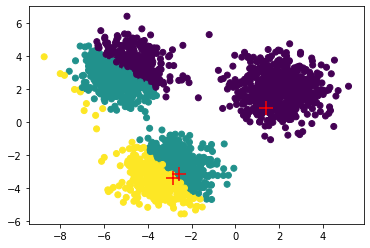

[0. 0. 0. ... 1. 1. 1.]


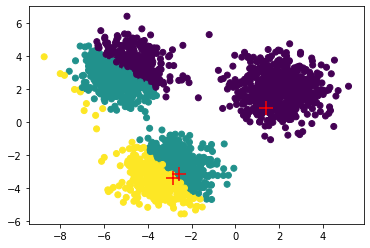

[0. 0. 0. ... 1. 1. 1.]


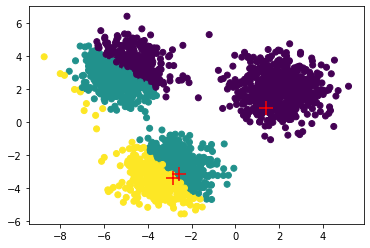

[0. 0. 0. ... 1. 1. 1.]


In [119]:
# Enter your code here
for count in range(10):
    z = identify_cluster_center_for_each_point(X, cluster_centers, k)
    plot(X, cluster_centers, z)
    print(z)
    if count < -1:
        plt.subplot(2,2,count + 1)
        plot(X, cluster_centers, z)